# SpringBoard Capstone2: Coronavirus Tweets Sentiment Analysis

    Data from Kaggle.com: https://www.kaggle.com/datatattle/covid-19-nlp-text-classification/metadata
## Multi_Dense_Layer used for modeling

In [63]:
# ## Cell used in Kaggles webpage

# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# # import os
# # for dirname, _, filenames in os.walk('/kaggle/input'):
# #     for filename in filenames:
# #         print(os.path.join(dirname, filename))

# # # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [64]:
import nltk
nltk.download('wordnet')
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
# from wordcloud import WordCloud
import re
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay

### references: 
### https://www.analyticsvidhya.com/blog/2021/06/twitter-sentiment-analysis-a-nlp-use-case-for-beginners/
### https://github.com/mengyanl/Twitter_Sentiment_Analysis/blob/main/notebooks/1.5%20Twitter%20Sentiment%20Analysis%20-%20Bag%20of%20Words%20(Code%20Submission).ipynb

[nltk_data] Downloading package wordnet to /Users/Ling/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [65]:
tweet_whole_train = pd.read_csv('/Users/Ling/Desktop/01_Springboard/Corona_Tweet/Data/Corona_NLP_train.csv', index_col = 0)
print(tweet_whole_train.info())
test = pd.read_csv('/Users/Ling/Desktop/01_Springboard/Corona_Tweet/Data/Corona_NLP_test.csv', index_col = 0)
print(test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41157 entries, 3799 to 44955
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ScreenName     41157 non-null  int64 
 1   Location       32567 non-null  object
 2   TweetAt        41157 non-null  object
 3   OriginalTweet  41157 non-null  object
 4   Sentiment      41157 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.9+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3798 entries, 1 to 3798
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ScreenName     3798 non-null   int64 
 1   Location       2964 non-null   object
 2   TweetAt        3798 non-null   object
 3   OriginalTweet  3798 non-null   object
 4   Sentiment      3798 non-null   object
dtypes: int64(1), object(4)
memory usage: 178.0+ KB
None


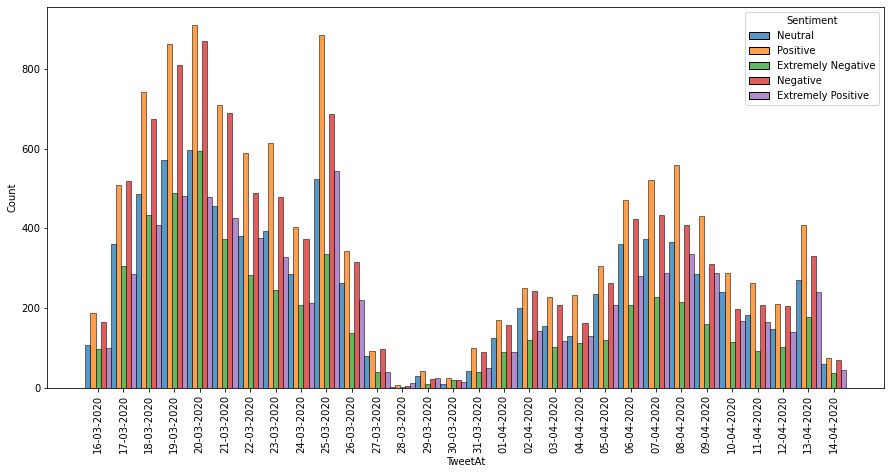

In [66]:
plt.figure(figsize=[15,7])
sns.histplot(data=tweet_whole_train, x = 'TweetAt', hue = 'Sentiment', multiple='dodge')
plt.xticks(rotation = 90)
plt.show()

In [67]:
# plt.figure(figsize=[15,7])
# sns.histplot(data=test, x = 'TweetAt', hue = 'Sentiment', multiple='dodge')
# plt.xticks(rotation = 90)
# plt.show()

In [68]:
print(len(tweet_whole_train['Location'].unique()))
print(len(test['Location'].unique()))

12221
1718


In [69]:
tweet = tweet_whole_train[['OriginalTweet', 'Sentiment']]

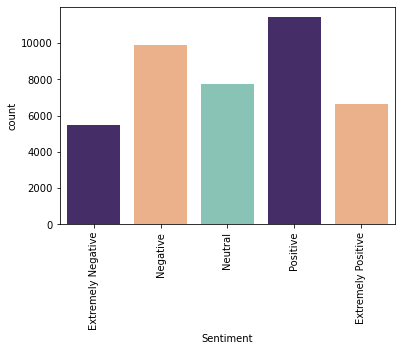

In [70]:
order = ['Extremely Negative', 'Negative', 'Neutral','Positive','Extremely Positive']
sns.countplot(x = 'Sentiment', data = tweet, order = order, palette=['#432371',"#FAAE7B","#7fcdbb"])
plt.xticks(rotation = 90)
plt.show()

In [71]:
# lower case all text
tweet['OriginalTweet'] = tweet['OriginalTweet'].str.lower()
test['OriginalTweet'] = test['OriginalTweet'].str.lower()

print('TRAIN DATA \n', tweet['OriginalTweet'].head())
print('\n TEST DATA \n', test['OriginalTweet'].head())

TRAIN DATA 
 UserName
3799    @menyrbie @phil_gahan @chrisitv https://t.co/i...
3800    advice talk to your neighbours family to excha...
3801    coronavirus australia: woolworths to give elde...
3802    my food stock is not the only one which is emp...
3803    me, ready to go at supermarket during the #cov...
Name: OriginalTweet, dtype: object

 TEST DATA 
 UserName
1    trending: new yorkers encounter empty supermar...
2    when i couldn't find hand sanitizer at fred me...
3    find out how you can protect yourself and love...
4    #panic buying hits #newyork city as anxious sh...
5    #toiletpaper #dunnypaper #coronavirus #coronav...
Name: OriginalTweet, dtype: object


<ipython-input-71-f65a37d2acef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet['OriginalTweet'] = tweet['OriginalTweet'].str.lower()


In [72]:
def remove_at_signs(text):
    return " ".join([word for word in str(text).split() if not word.startswith('@')])
tweet['OriginalTweet'] = tweet['OriginalTweet'].apply(lambda text: remove_at_signs(text))
test['OriginalTweet'] = test['OriginalTweet'].apply(lambda text: remove_at_signs(text))

print('TRAIN DATA \n', tweet['OriginalTweet'].head())
print('\n TEST DATA \n', test['OriginalTweet'].head())

TRAIN DATA 
 UserName
3799    https://t.co/ifz9fan2pa and https://t.co/xx6gh...
3800    advice talk to your neighbours family to excha...
3801    coronavirus australia: woolworths to give elde...
3802    my food stock is not the only one which is emp...
3803    me, ready to go at supermarket during the #cov...
Name: OriginalTweet, dtype: object

 TEST DATA 
 UserName
1    trending: new yorkers encounter empty supermar...
2    when i couldn't find hand sanitizer at fred me...
3    find out how you can protect yourself and love...
4    #panic buying hits #newyork city as anxious sh...
5    #toiletpaper #dunnypaper #coronavirus #coronav...
Name: OriginalTweet, dtype: object


<ipython-input-72-924ac800784c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet['OriginalTweet'] = tweet['OriginalTweet'].apply(lambda text: remove_at_signs(text))


In [73]:
import itertools
def cleaning_repeating_char(text):
    cl = ''.join(ch for ch, _ in itertools.groupby(text))
    return cl
tweet['OriginalTweet'] = tweet['OriginalTweet'].apply(lambda x: cleaning_repeating_char(x))
test['OriginalTweet'] = test['OriginalTweet'].apply(lambda x: cleaning_repeating_char(x))

print('TRAIN DATA \n', tweet['OriginalTweet'].head())
print('\n TEST DATA \n', test['OriginalTweet'].head())

TRAIN DATA 
 UserName
3799    htps:/t.co/ifz9fan2pa and htps:/t.co/x6ghgfzc ...
3800    advice talk to your neighbours family to excha...
3801    coronavirus australia: wolworths to give elder...
3802    my fod stock is not the only one which is empt...
3803    me, ready to go at supermarket during the #cov...
Name: OriginalTweet, dtype: object

 TEST DATA 
 UserName
1    trending: new yorkers encounter empty supermar...
2    when i couldn't find hand sanitizer at fred me...
3    find out how you can protect yourself and love...
4    #panic buying hits #newyork city as anxious sh...
5    #toiletpaper #dunypaper #coronavirus #coronavi...
Name: OriginalTweet, dtype: object


<ipython-input-73-8d4802ada748>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet['OriginalTweet'] = tweet['OriginalTweet'].apply(lambda x: cleaning_repeating_char(x))


In [74]:
def cleaning_URLs(data):
    return re.sub('[^ ]+\.[^ ]+' , ' url', data)
tweet['OriginalTweet'] = tweet['OriginalTweet'].apply(lambda x: cleaning_URLs(x))
test['OriginalTweet'] = test['OriginalTweet'].apply(lambda x: cleaning_URLs(x))

print('TRAIN DATA \n', tweet['OriginalTweet'].head())
print('\n TEST DATA \n', test['OriginalTweet'].head())

TRAIN DATA 
 UserName
3799                                url and  url and  url
3800    advice talk to your neighbours family to excha...
3801    coronavirus australia: wolworths to give elder...
3802    my fod stock is not the only one which is empt...
3803    me, ready to go at supermarket during the #cov...
Name: OriginalTweet, dtype: object

 TEST DATA 
 UserName
1    trending: new yorkers encounter empty supermar...
2    when i couldn't find hand sanitizer at fred me...
3    find out how you can protect yourself and love...
4    #panic buying hits #newyork city as anxious sh...
5    #toiletpaper #dunypaper #coronavirus #coronavi...
Name: OriginalTweet, dtype: object


<ipython-input-74-1b8d7a4d6e5f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet['OriginalTweet'] = tweet['OriginalTweet'].apply(lambda x: cleaning_URLs(x))


In [75]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans(' ', ' ', punctuations_list)
    return text.translate(translator)
tweet['OriginalTweet']= tweet['OriginalTweet'].apply(lambda x: cleaning_punctuations(x))
test['OriginalTweet']= test['OriginalTweet'].apply(lambda x: cleaning_punctuations(x))

print('TRAIN DATA \n', tweet['OriginalTweet'].head())
print('\n TEST DATA \n', test['OriginalTweet'].head())

TRAIN DATA 
 UserName
3799                                url and  url and  url
3800    advice talk to your neighbours family to excha...
3801    coronavirus australia wolworths to give elderl...
3802    my fod stock is not the only one which is empt...
3803    me ready to go at supermarket during the covid...
Name: OriginalTweet, dtype: object

 TEST DATA 
 UserName
1    trending new yorkers encounter empty supermark...
2    when i couldnt find hand sanitizer at fred mey...
3    find out how you can protect yourself and love...
4    panic buying hits newyork city as anxious shop...
5    toiletpaper dunypaper coronavirus coronavirusa...
Name: OriginalTweet, dtype: object


<ipython-input-75-07738a1d2c6a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet['OriginalTweet']= tweet['OriginalTweet'].apply(lambda x: cleaning_punctuations(x))


In [76]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
tweet['OriginalTweet'] = tweet['OriginalTweet'].apply(lambda x: cleaning_numbers(x))
test['OriginalTweet'] = test['OriginalTweet'].apply(lambda x: cleaning_numbers(x))

print('TRAIN DATA \n', tweet['OriginalTweet'].head())
print('\n TEST DATA \n', test['OriginalTweet'].head())

TRAIN DATA 
 UserName
3799                                url and  url and  url
3800    advice talk to your neighbours family to excha...
3801    coronavirus australia wolworths to give elderl...
3802    my fod stock is not the only one which is empt...
3803    me ready to go at supermarket during the covid...
Name: OriginalTweet, dtype: object

 TEST DATA 
 UserName
1    trending new yorkers encounter empty supermark...
2    when i couldnt find hand sanitizer at fred mey...
3    find out how you can protect yourself and love...
4    panic buying hits newyork city as anxious shop...
5    toiletpaper dunypaper coronavirus coronavirusa...
Name: OriginalTweet, dtype: object


<ipython-input-76-89c92968cac6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet['OriginalTweet'] = tweet['OriginalTweet'].apply(lambda x: cleaning_numbers(x))


In [77]:
# Tokenize the OriginalTweet text
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()
tweet['Tokens'] = [tknzr.tokenize(t) for t in tweet['OriginalTweet']]
tweet['Tokens'].head()

<ipython-input-77-116119311db9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet['Tokens'] = [tknzr.tokenize(t) for t in tweet['OriginalTweet']]


UserName
3799                            [url, and, url, and, url]
3800    [advice, talk, to, your, neighbours, family, t...
3801    [coronavirus, australia, wolworths, to, give, ...
3802    [my, fod, stock, is, not, the, only, one, whic...
3803    [me, ready, to, go, at, supermarket, during, t...
Name: Tokens, dtype: object

In [78]:
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
tweet['Tokens']= tweet['Tokens'].apply(lambda x: stemming_on_text(x))
tweet['Tokens'].head(10)

<ipython-input-78-9e413b8e77ce>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet['Tokens']= tweet['Tokens'].apply(lambda x: stemming_on_text(x))


UserName
3799                            [url, and, url, and, url]
3800    [advice, talk, to, your, neighbours, family, t...
3801    [coronavirus, australia, wolworths, to, give, ...
3802    [my, fod, stock, is, not, the, only, one, whic...
3803    [me, ready, to, go, at, supermarket, during, t...
3804    [as, news, of, the, region, , s, first, confi...
3805    [cashier, at, grocery, store, was, sharing, hi...
3806    [was, at, the, supermarket, today, didnt, buy,...
3807    [due, to, covid, our, retail, store, and, clas...
3808    [for, corona, preventionwe, should, stop, to, ...
Name: Tokens, dtype: object

In [79]:
stop_words = ['a',
 'about',
 'above',
 'after',
 'am',
 'all',
              'al',
              
              'an',
 'and',
 'any',
 'are',
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'but',
 'by',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'down',
 'during',
 'each',
 'for',
 'from',
 'further',
 'had',
 'has',
 'have',
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'it',
 "it's",
 'its',
 'itself',
 "let's",
 'me',
 'my',
 'myself',
 'of',
 'off',
 'on',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'same',
 'she',
 "she'd",
 "she'll",
 "she's",
 'should',
 'so',
 'some',
 'such',
 'than',
 'that',
 "that's",
 'the',
 'their',
 'theirs',
 'them',
 'themselves',
 'then',
 'there',
 "there's",
 'these',
 'they',
 "they'd",
 "they'll",
 "they're",
 "they've",
 'this',
 'those',
 'through',
 'to',
 'under',
 'until',
 'up',
 'very',
 'was',
 'we',
 "we'd",
 "we'll",
 "we're",
 "we've",
 'were',
 'what',
 "what's",
 'when',
 "when's",
 'where',
 "where's",
 'which',
 'while',
 'who',
 "who's",
 'whom',
 'why',
 "why's",
 'with',
 "won't",
 'would',
 'you',
 "you'd",
 "you'll",
 "you're",
 "you've",
 'your',
 'yours',
 'yourself',
 'yourselves',
 "that'll",
 's',
 't',
 'can',
 'will',
 'just',
 'don',
 "should've",
 'now',
 'd',
 'll',
 'm',
 'o',
 're',
 've',
 'y',
 'ma',
 'across',
 'im',
 'l',
 'shes',
 'thatl',
 'thatll',
 'wil',
 'youd',
 'youl',
 'youll',
 'youre',
 'youve']

In [80]:
STOPWORDS = set(stop_words)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
tweet['OriginalTweet'] = tweet['OriginalTweet'].apply(lambda text: cleaning_stopwords(text))
test['OriginalTweet'] = test['OriginalTweet'].apply(lambda text: cleaning_stopwords(text))

print('TRAIN DATA \n', tweet['OriginalTweet'].head())
print('\n TEST DATA \n', test['OriginalTweet'].head())

TRAIN DATA 
 UserName
3799                                          url url url
3800    advice talk neighbours family exchange phone n...
3801    coronavirus australia wolworths give elderly d...
3802    fod stock not only one empty please dont panic...
3803    ready go supermarket covid outbreak not parano...
Name: OriginalTweet, dtype: object

 TEST DATA 
 UserName
1    trending new yorkers encounter empty supermark...
2    couldnt find hand sanitizer fred meyer turned ...
3                  find protect loved ones coronavirus
4    panic buying hits newyork city anxious shopers...
5    toiletpaper dunypaper coronavirus coronavirusa...
Name: OriginalTweet, dtype: object


<ipython-input-80-e727e90cafac>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet['OriginalTweet'] = tweet['OriginalTweet'].apply(lambda text: cleaning_stopwords(text))


In [81]:
# Tokenize the OriginalTweet text
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()
tweet['Tokens'] = [tknzr.tokenize(t) for t in tweet['OriginalTweet']]
test['Tokens'] = [tknzr.tokenize(t) for t in test['OriginalTweet']]

print('TRAIN DATA \n', tweet['Tokens'].head())
print('\n TEST DATA \n', test['Tokens'].head())

<ipython-input-81-e18c1b857b21>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet['Tokens'] = [tknzr.tokenize(t) for t in tweet['OriginalTweet']]


TRAIN DATA 
 UserName
3799                                      [url, url, url]
3800    [advice, talk, neighbours, family, exchange, p...
3801    [coronavirus, australia, wolworths, give, elde...
3802    [fod, stock, not, only, one, empty, please, do...
3803    [ready, go, supermarket, covid, outbreak, not,...
Name: Tokens, dtype: object

 TEST DATA 
 UserName
1    [trending, new, yorkers, encounter, empty, sup...
2    [couldnt, find, hand, sanitizer, fred, meyer, ...
3            [find, protect, loved, ones, coronavirus]
4    [panic, buying, hits, newyork, city, anxious, ...
5    [toiletpaper, dunypaper, coronavirus, coronavi...
Name: Tokens, dtype: object


In [82]:
nltk.download('averaged_perceptron_tagger')
tag1 = nltk.pos_tag(tweet.iloc[20011,2])
tag1

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/Ling/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('please', 'NN'),
 ('remain', 'VBP'),
 ('vigilant', 'JJ'),
 ('report', 'NN'),
 ('suspected', 'VBD'),
 ('fraud', 'NN'),
 ('schemes', 'NNS'),
 ('involving', 'VBG'),
 ('covid', 'NN'),
 ('caling', 'VBG'),
 ('national', 'JJ'),
 ('center', 'NN'),
 ('disaster', 'NN'),
 ('fraud', 'NN'),
 ('hotline', 'NN'),
 ('emailing', 'VBG'),
 ('url', 'RB'),
 ('more', 'JJR'),
 ('information', 'NN'),
 ('avoid', 'IN'),
 ('coronavirus', 'NN'),
 ('related', 'JJ'),
 ('scams', 'NNS'),
 ('url', 'VBP')]

In [83]:
lm = nltk.stem.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
tweet['Tokens'] = tweet['Tokens'].apply(lambda x: lemmatizer_on_text(x))
test['Tokens'] = test['Tokens'].apply(lambda x: lemmatizer_on_text(x))

print('TRAIN DATA \n', tweet['Tokens'].head())
print('\n TEST DATA \n', test['Tokens'].head())

<ipython-input-83-61c95a0fc1b3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet['Tokens'] = tweet['Tokens'].apply(lambda x: lemmatizer_on_text(x))


TRAIN DATA 
 UserName
3799                                      [url, url, url]
3800    [advice, talk, neighbours, family, exchange, p...
3801    [coronavirus, australia, wolworths, give, elde...
3802    [fod, stock, not, only, one, empty, please, do...
3803    [ready, go, supermarket, covid, outbreak, not,...
Name: Tokens, dtype: object

 TEST DATA 
 UserName
1    [trending, new, yorkers, encounter, empty, sup...
2    [couldnt, find, hand, sanitizer, fred, meyer, ...
3            [find, protect, loved, ones, coronavirus]
4    [panic, buying, hits, newyork, city, anxious, ...
5    [toiletpaper, dunypaper, coronavirus, coronavi...
Name: Tokens, dtype: object


In [84]:
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
tweet['Tokens']= tweet['Tokens'].apply(lambda x: stemming_on_text(x))
tweet['Tokens'].head(10)

<ipython-input-84-9e413b8e77ce>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet['Tokens']= tweet['Tokens'].apply(lambda x: stemming_on_text(x))


UserName
3799                                      [url, url, url]
3800    [advice, talk, neighbours, family, exchange, p...
3801    [coronavirus, australia, wolworths, give, elde...
3802    [fod, stock, not, only, one, empty, please, do...
3803    [ready, go, supermarket, covid, outbreak, not,...
3804    [news, region, , s, first, confirmed, covid, ...
3805    [cashier, grocery, store, sharing, insights, c...
3806    [supermarket, today, didnt, buy, toilet, paper...
3807    [due, covid, retail, store, clasrom, atlanta, ...
3808    [corona, preventionwe, stop, buy, things, cash...
Name: Tokens, dtype: object

In [85]:
tweet['text'] = tweet["Tokens"].map(' '.join)
test['text'] = test["Tokens"].map(' '.join)

print('TRAIN DATA \n', tweet['text'].head())
print('\n TEST DATA \n', test['text'].head())

TRAIN DATA 
 UserName
3799                                          url url url
3800    advice talk neighbours family exchange phone n...
3801    coronavirus australia wolworths give elderly d...
3802    fod stock not only one empty please dont panic...
3803    ready go supermarket covid outbreak not parano...
Name: text, dtype: object

 TEST DATA 
 UserName
1    trending new yorkers encounter empty supermark...
2    couldnt find hand sanitizer fred meyer turned ...
3                  find protect loved ones coronavirus
4    panic buying hits newyork city anxious shopers...
5    toiletpaper dunypaper coronavirus coronavirusa...
Name: text, dtype: object


<ipython-input-85-b431f87894f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet['text'] = tweet["Tokens"].map(' '.join)


In [86]:
STOPWORDS = set(stop_words)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
tweet['text'] = tweet['text'].apply(lambda text: cleaning_stopwords(text))
test['text'] = test['text'].apply(lambda text: cleaning_stopwords(text))

print('TRAIN DATA \n', tweet['text'].head())
print('\n TEST DATA \n', test['text'].head())

TRAIN DATA 
 UserName
3799                                          url url url
3800    advice talk neighbours family exchange phone n...
3801    coronavirus australia wolworths give elderly d...
3802    fod stock not only one empty please dont panic...
3803    ready go supermarket covid outbreak not parano...
Name: text, dtype: object

 TEST DATA 
 UserName
1    trending new yorkers encounter empty supermark...
2    couldnt find hand sanitizer fred meyer turned ...
3                  find protect loved ones coronavirus
4    panic buying hits newyork city anxious shopers...
5    toiletpaper dunypaper coronavirus coronavirusa...
Name: text, dtype: object


<ipython-input-86-ad510adabaa2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet['text'] = tweet['text'].apply(lambda text: cleaning_stopwords(text))


In [87]:
!pip install textblob

In [88]:
#Adding dimensions with textblob
#TextBlob Features
from textblob import TextBlob

def tb_enrich(ls):
    #Enriches a column of text with TextBlob Sentiment Analysis outputs
    tb_polarity = []
    tb_subject = []

    for tweet in ls:
        sentiment = TextBlob(tweet).sentiment
        tb_polarity.append(sentiment[0])
        tb_subject.append(sentiment[1])
    

    return tb_polarity, tb_subject
    
tweet["Polarity"], tweet["Subjectivity"] = tb_enrich(list(tweet["text"]))
test["Polarity"], test["Subjectivity"] = tb_enrich(list(test["text"]))

In [89]:
tweet.describe()

,Polarity,Subjectivity
count,41157.000000,41157.000000
mean,0.070293,0.345353
std,0.236828,0.285031
min,-1.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.363889
75%,0.200000,0.523810
max,1.000000,1.000000


In [95]:
from sklearn.feature_extraction.text import CountVectorizer  
from sklearn.model_selection import train_test_split 

X = tweet['text'] 
y = tweet['Sentiment']

Count_vect = CountVectorizer(ngram_range=(1, 1), max_df=0.1, min_df=20)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)
Count_train = Count_vect.fit_transform(X_train).toarray()
Count_test = Count_vect.transform(X_test).toarray()

# Print the features
print('# of feature names', len(Count_vect.get_feature_names()))
print(Count_vect.get_feature_names()[99::100])

# of feature names 3652
['amazon', 'atendants', 'biding', 'ca', 'checking', 'comisioner', 'coronavirusuk', 'dad', 'disaster', 'easier', 'everywhere', 'fears', 'fot', 'gone', 'helo', 'ignorant', 'ireland', 'layofs', 'lovely', 'mesages', 'neded', 'operation', 'pensylvania', 'post', 'provide', 'recent', 'reusable', 'science', 'show', 'speaks', 'strategic', 'tax', 'tonight', 'unilever', 'wana', 'word']


In [31]:
# #Tokenisation
# from tensorflow.keras.preprocessing.text import Tokenizer

# #Define the Tokeniser
# tokenizer = Tokenizer(num_words=3000, lower=True)

# #Create the corpus by finding the most common 
# tokenizer.fit_on_texts(tweet["text"])

# ##Train
# #Tokenise our column of edited Tweet content
# tweet_tokens = tokenizer.texts_to_matrix(list(tweet["text"]))

# #Test
# #Tokenise our column of edited Tweet content
# tweet_tokens_test = tokenizer.texts_to_matrix(list(test["text"]))


In [32]:
#Combining the dataframe with the tokens using pd.concat

#Reset axes to avoid overlapping
# tweet.reset_index(drop=True, inplace=True)
# test.reset_index(drop=True, inplace=True)

##Train
# full_train = pd.concat([tweet[['Polarity', 'Subjectivity']], pd.DataFrame(tweet_tokens)], sort=False, axis=1)

In [33]:
# full_train.head()

In [34]:
# ##Train
# full_train2 = 
# full_train2.head()

# full_test2 = 
# full_train.head()

In [35]:
#Define the indexing for each possible label in a dictionary
class_to_index = {"Neutral":2, "Positive":3, "Negative":1,"Extremely Negative":0, "Extremely Positive": 4}

#Creates a reverse dictionary
index_to_class = dict((v,k) for k, v in class_to_index.items())

#Creates lambda functions, applying the appropriate dictionary
names_to_ids = lambda n: np.array([class_to_index.get(x) for x in n])
ids_to_names = lambda n: np.array([index_to_class.get(x) for x in n])

#Test each function
print(names_to_ids(["Extremely Positive", "Negative", "Positive", "Neutral"]))
print(ids_to_names([0,1,2,3]))


#Convert the "Sentiment" column into indexes
y_train_id = names_to_ids(y_train)
y_test_id = names_to_ids(y_test)

y_test_id[0:3]

[4 1 3 2]
['Extremely Negative' 'Negative' 'Neutral' 'Positive']


array([2, 0, 3])

In [36]:
y_test_id.shape

(6174,)

In [39]:
!pip install tensorflow

     |████████████████████████████████| 207.1 MB 61 kB/s  eta 0:00:012   |███████████████                 | 97.6 MB 964 kB/s eta 0:01:54     |██████████████████████████      | 168.7 MB 2.2 MB/s eta 0:00:18     |██████████████████████████▌     | 171.7 MB 3.4 MB/s eta 0:00:11     |██████████████████████████▊     | 172.8 MB 3.4 MB/s eta 0:00:11
     |████████████████████████████████| 463 kB 4.3 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 2.6 MB/s eta 0:00:01
     |████████████████████████████████| 4.2 MB 2.6 MB/s eta 0:00:01
     |████████████████████████████████| 126 kB 301 kB/s eta 0:00:01
     |████████████████████████████████| 65 kB 584 kB/s eta 0:00:01
     |████████████████████████████████| 12.2 MB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 5.8 MB 2.9 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 4.0 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 5.2 MB/s eta 0:00:01
     |████████████████████████████████| 1.3 MB

In [40]:
import tensorflow as tf
train_tf = tf.convert_to_tensor(Count_train)
test_tf = tf.convert_to_tensor(Count_test)

In [41]:
train_tf.shape

TensorShape([34983, 3652])

In [50]:
#Tensorflow / Keras
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_dim=3652, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    #tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(10, activation='relu'),
    #tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

#Compile the model so it can be trained
model.compile(
     loss='sparse_categorical_crossentropy',
     optimizer='adam',
     metrics=['accuracy']
)

In [51]:
h = model.fit(
     train_tf, y_train_id,
     epochs=6,
     callbacks=[tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=5)]
)


Epoch 1/6
1094/1094 [==============================] - 4s 3ms/step - loss: 1.2194 - accuracy: 0.4831
Epoch 2/6
1094/1094 [==============================] - 3s 3ms/step - loss: 0.9115 - accuracy: 0.6570
Epoch 3/6
1094/1094 [==============================] - 3s 3ms/step - loss: 0.8222 - accuracy: 0.6977
Epoch 4/6
1094/1094 [==============================] - 3s 3ms/step - loss: 0.7607 - accuracy: 0.7200
Epoch 5/6
1094/1094 [==============================] - 3s 3ms/step - loss: 0.7089 - accuracy: 0.7449
Epoch 6/6
1094/1094 [==============================] - 3s 3ms/step - loss: 0.6735 - accuracy: 0.7552


In [52]:
#Generate predictions

y_pred = np.argmax(model.predict(test_tf), axis=1)

cm = confusion_matrix(y_test_id, y_pred, normalize = 'true')

print(cm)

[[0.60379747 0.33797468 0.02658228 0.03037975 0.00126582]
 [0.06662269 0.66952507 0.11807388 0.13654354 0.00923483]
 [0.00765306 0.11564626 0.77295918 0.09608844 0.00765306]
 [0.00414938 0.10195614 0.09899229 0.69176052 0.10314167]
 [0.00298507 0.0199005  0.02089552 0.2318408  0.72437811]]


In [53]:
#To see the final accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test_id, y_pred)
print(classification_report(y_test_id, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.60      0.69       790
           1       0.63      0.67      0.65      1516
           2       0.70      0.77      0.74      1176
           3       0.67      0.69      0.68      1687
           4       0.79      0.72      0.75      1005

    accuracy                           0.70      6174
   macro avg       0.72      0.69      0.70      6174
weighted avg       0.70      0.70      0.70      6174



In [54]:
y_pred_labels = ids_to_names(y_pred)
y_test_labels = ids_to_names(y_test_id)

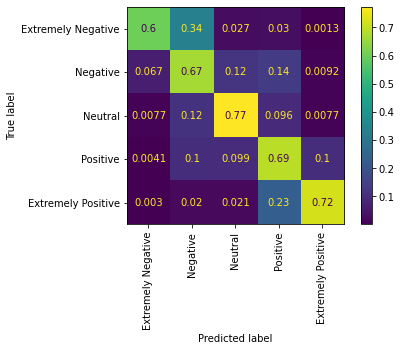

In [55]:
y_unique = ["Extremely Negative", "Negative", "Neutral", "Positive", "Extremely Positive"]
cm = confusion_matrix(y_test_labels, y_pred_labels, labels = y_unique, normalize='true')

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y_unique)
disp.plot(xticks_rotation='vertical',)